In [155]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,dataset
from torch.utils.data import sampler,TensorDataset
import torchvision.datasets as dset
import torchvision.transforms as T
from torchvision import transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import cv2
import torchvision
dtype = torch.float32
print("CUDA: ",torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
%load_ext autoreload
%autoreload 2
%matplotlib inline

def imshow(axis, inp):
    """Denormalize and show"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    axis.imshow(inp)

import openslide
import matplotlib.pyplot as plt
import numpy as np
import cv2

CUDA:  False
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [188]:
path = "/Users/richard/PycharmProjects/FUN/data/08e47f17-7dbc-4ed9-acff-3f350425fcaf/TCGA-EJ-7330-11A-01-TS1.6f91bf0b-9dab-4d24-8e13-f14f35f54086.svs"
pic = openslide.OpenSlide(path)
print(pic.level_dimensions)

img = pic.get_thumbnail((1000,1000))
print(pic.level_downsamples)

((54264, 32103), (13566, 8025), (3391, 2006))
(1.0, 4.00018691588785, 16.002924358743293)


In [48]:
import openslide
import matplotlib.pyplot as plt
import numpy as np

slide = openslide.OpenSlide(path) #读入图片（）
print(slide.level_dimensions)

downsamples=slide.level_downsamples #每一个级别K的对应的下采样因子，下采样因子应该对应一个倍率

[w, h] = slide.level_dimensions[0] #最高倍下的宽高
size1 = int(w*(downsamples[0]/downsamples[2]))# 计算级别k下的总宽
size2 = int(h*(downsamples[0]/downsamples[2])) # 计算k下的总高

region = slide.read_region((0, 0), 2, (size1, size2))#先读取，再数组化
# #[m, n] = slide.dimensions
# print(w, h)
# #print(downsamples[0])
# print(size1, size2)
region.show()

((54264, 32103), (13566, 8025), (3391, 2006))


In [195]:
print("dowansamples:",pic.level_downsamples)
print("dimensions:",pic.level_dimensions)
print("main_dimensions:",pic.dimensions)

dowansamples: (1.0, 4.00018691588785, 16.002924358743293)
dimensions: ((54264, 32103), (13566, 8025), (3391, 2006))
main_dimensions: (54264, 32103)


In [150]:
import cv2
import openslide
from PIL import Image
pic_root = "/Users/richard/PycharmProjects/FUN/pic_save"
pic = openslide.open_slide(path)
im = pic.read_region((8000,8000),0,(2000,2000))
#im.show()
nd = np.array(im)

def check_valid(img):
    m = np.array(img)
    valid = np.sum(m<240)/np.prod(m.shape)
    return valid


def R(img):
    return img[:,:,0]

def G(img):
    return img[:,:,1]

def B(img):
    return img[:,:,2]

def blue(img):
    """
    :param img: 4-channel pic (R-0 G-1 B-2)
    :return: how blue it is
    """
    img = np.array(img).astype('int')
    matrix1 = (B(img)*100)/(R(img)+G(img))
    matrix2 = 256/(R(img)+G(img)+B(img))
    matrix1 = matrix1 * matrix2
    return np.average(matrix1)

# check_valid(nd)
# print(type(im))
# im = np.array(im)
# #check_valid(cv2.imread("/Users/richard/PycharmProjects/FUN/pic_save/0_0.png"))
# im_gray = cv2.cvtColor(im,cv2.COLOR_HSV2)
#
# ret1, th1 = cv2.threshold(im_gray, 0, 255, cv2.THRESH_OTSU)
# ax1 = plt.subplot(2,2,1)
# ax1.imshow(im_gray)
#
# ax2 = plt.subplot(2,2,2)
# ax2.imshow(th1)
#
# ax3 = plt.subplot(2,2,3)
# ax3.imshow(im)
#
# im_init = cv2.cvtColor(th1,cv2.COLOR_GRAY2RGB)
# ax4 = plt.subplot(2,2,4)
# ax4.imshow(im_init)

In [214]:
!./a.sh
count = 0
iv = None
pic = openslide.open_slide(path)
path = "/Users/richard/PycharmProjects/FUN/Slide_Image/37d6ad76-7ca1-4862-9243-84b2affc24d3/TCGA-CH-5744-01A-01-TS1.77d7a80d-9b03-4948-a229-3bf9c29a870a.svs"
from queue import PriorityQueue
que = PriorityQueue()
for x in range(0,pic.level_dimensions[1][0]-224,224):
    for y in range(0,pic.level_dimensions[1][1]-224,224):
        count = count + 1
        im = pic.read_region((x,y),1,(224,224))
        valid = check_valid(im)
        if valid <= 0.6:
            continue
        que.put((blue(im),im))
        while que.qsize() > 10:
            que.get()

while not que.empty():
    valid,im = que.get()
    im.save("/Users/richard/PycharmProjects/FUN/pic_save/"+str(valid)+".png")

4

In [24]:
pic_path = '/Users/richard/PycharmProjects/FUN/pic_save/0_22000.png'
pic = cv2.imread(pic_path)
print(np.sum(pic>240)/(2000*2000*3))
np.prod(p)

0.9890940833333334


TypeError: dot() missing 1 required positional argument: 'b'

In [73]:
a = np.arange(16*16).reshape(4,4,4,4)
a[0,:,:,:].shape

(4, 4, 4)

In [83]:
def R(img):
    return img[:,:,0]

def G(img):
    return img[:,:,1]

def B(img):
    return img[:,:,2]

def blue(img):
    """
    :param img: 4-channel pic (R-0 G-1 B-2)
    :return: how blue it is
    """
    img /= 256
    matrix1 = B(img)*100/(1+R(img)+G(img))
    matrix2 = 256/(1+R(img)+G(img)+B(img))
    matrix1 = matrix1 * matrix2
    return np.average(matrix1)

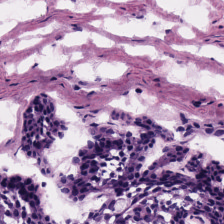

In [186]:
pic = openslide.OpenSlide(path)
im = pic.read_region((8000,8000),1,(224,224))

In [166]:
img = np.array(iv).astype('int'

array([[[0.00366013, 0.00355248, 0.0035371 , 0.00392157],
        [0.00367551, 0.00356786, 0.00358324, 0.00392157],
        [0.00367551, 0.00359862, 0.00364475, 0.00392157],
        ...,
        [0.00181469, 0.00098424, 0.00195309, 0.00392157],
        [0.00201461, 0.00109189, 0.00190696, 0.00392157],
        [0.00253749, 0.00126105, 0.00179931, 0.00392157]],

       [[0.00367551, 0.00355248, 0.00359862, 0.00392157],
        [0.00369089, 0.00356786, 0.00361399, 0.00392157],
        [0.00370627, 0.00359862, 0.00364475, 0.00392157],
        ...,
        [0.00181469, 0.00098424, 0.0020915 , 0.00392157],
        [0.00201461, 0.00107651, 0.00207612, 0.00392157],
        [0.00244521, 0.00124567, 0.00199923, 0.00392157]],

       [[0.00369089, 0.00355248, 0.00366013, 0.00392157],
        [0.00370627, 0.00356786, 0.00366013, 0.00392157],
        [0.00372165, 0.00359862, 0.00364475, 0.00392157],
        ...,
        [0.00189158, 0.00095348, 0.00201461, 0.00392157],
        [0.0020915 , 0.001061